## Importing libraries

In [3]:
from visualizations import show_results, get_experiment_results, get_column_names, verify_integrity
import pandas as pd

## setting up expriment related variables

#### important variable names

In [4]:
columns = ["algo", "experiment_id", "dataset", "seed", "generation", "training_fitness", "timing", "pop_node_count"]
logger_name = "liah_full.csv"
log_level = 1

## Analysing the results

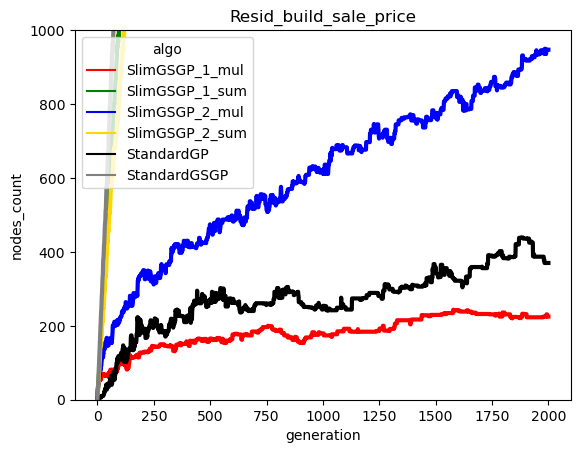

In [8]:
show_results(x_var = "generation", y_var="nodes_count", experiment_id=None, logger_name="resid_final.csv",
             log_level=1, dataset="resid_build_sale_price")

In [97]:
ws = open('elite_looks.txt', 'r')
for line in ws:
    print(line)

{0: {'structure': [('add', 'x2', 'x6'), [<function one_tree_delta.<locals>.ot_delta at 0x7fcc00e1ea70>, <algorithms.GSGP.representations.tree.Tree object at 0x7fcc00e64160>, 0.9756585059369801], [<function one_tree_delta.<locals>.ot_delta at 0x7fcc00e1f130>, <algorithms.GSGP.representations.tree.Tree object at 0x7fcc00e65c30>, 0.29891632853958516], [<function one_tree_delta.<locals>.ot_delta at 0x7fcc00e1f910>, <algorithms.GSGP.representations.tree.Tree object at 0x7fcc00e657e0>, 0.08366312089575845], [<function one_tree_delta.<locals>.ot_delta at 0x7fcc00e1d990>, <algorithms.GSGP.representations.tree.Tree object at 0x7fcc00e67430>, 0.12607830098910588]], 'looks': "('add', 'x2', 'x6') + f(('subtract', ('subtract', ('divide', 'x3', 'x3'), ('multiply', 'x0', 'x6')), 'x2')) + f(('subtract', ('divide', ('add', ('multiply', 'x4', ('add', 'x6', 'x3')), 'x2'), ('multiply', ('multiply', ('add', 'x2', 'x3'), 'x4'), ('add', ('subtract', 'x4', 'x1'), ('multiply', 'x3', 'x5')))), 'x4')) + f(('add'

### extra stuff for later

In [ ]:
""" RESID

df1 = get_experiment_results(experiment_id=None, logger_name="diogo3.csv") # all 30 seeds

df2 = get_experiment_results(experiment_id=None, logger_name="diogo.csv") # all 30 seeds
df2 = df2[df2.dataset == "resid_build_sale_price"]

df3 = get_experiment_results(experiment_id=None, logger_name="diogo2.csv") # all 30 seeds

df4 = get_experiment_results(experiment_id=None, logger_name="davide.csv") # seed 0 till 6
df4 = df4[df4.seed <= 6] 

df5 = get_experiment_results(experiment_id=None, logger_name="liah2.csv") # seed 7 till 30


final = pd.concat([df1,df2, df3, df4, df5])

for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')
        
final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("resid_final.csv", header=False,  index=False)



"""

In [ ]:
""" TOXICITY

df_mul = get_experiment_results(experiment_id=None, logger_name="liah_mul_logger.csv")
df_mul = df_mul[df_mul.dataset == "toxicity"]

df_s = get_experiment_results(experiment_id=None, logger_name="liah_sum_logger.csv")
df_s = df_s[df_s.dataset == "toxicity"]


fari = get_experiment_results(experiment_id=None, logger_name="diogo_slim_plus_one_logger_.csv")
fari = fari[fari.dataset == "toxicity"]

farid = get_experiment_results(experiment_id=None, logger_name="davide_toxicity_+1.csv")
farid = farid[farid.dataset == "toxicity"]
farid = farid[~farid.seed.isin(fari.seed.unique())]
fari_final = pd.concat([fari, farid])
diogo = get_experiment_results(experiment_id=None, logger_name="diogo_slim_logger.csv")

gp = get_experiment_results(experiment_id=None, logger_name="diogo_gp_logger.csv")

gsgp = get_experiment_results(experiment_id=None, logger_name="liah_gsgp.csv")
gsgp = gsgp[gsgp.dataset == "toxicity"]

final = pd.concat([diogo, fari_final, df_mul, df_s, gsgp, gp])
final['log_level'] = final.seed.map(lambda x: 1)


final.to_csv("toxicity_final.csv", header=False,  index=False)

"""

In [ ]:
""" PPB

d = get_experiment_results(experiment_id=None, logger_name="diogo_logger.csv")
mul1 = d[d.dataset== "ppb"]

d = get_experiment_results(experiment_id=None, logger_name="davide_logger2.csv")
plus1 = d[d.dataset == "ppb"]

d = get_experiment_results(experiment_id=None, logger_name="liah_logger.csv")

mul2 = d[(d.dataset=="ppb") & (d.algo == 'SlimGSGP_2_mul.csv' )]
sum2 = d[(d.dataset=="ppb") & (d.algo == 'SlimGSGP_2_sum.csv' )]

final = pd.concat([mul1,plus1, mul2, sum2])


final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("ppb_final.csv", header=False,  index=False)

for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')
        


"""

In [ ]:
""" TOXICITY MODIFIED
gp = get_experiment_results(experiment_id=None, logger_name="diogo_gp_logger.csv")

gsgp = get_experiment_results(experiment_id=None, logger_name="liah_gsgp.csv")
gsgp = gsgp[gsgp.dataset == "toxicity"]
tox = get_experiment_results(experiment_id=None, logger_name="LR_slim.csv")
tox = tox[tox.dataset=="toxicity"]
mul2 = tox[tox.algo == 'SlimGSGP_2_mul']
tox = tox[tox.experiment_id != "851e6ca8-f15b-11ee-a444-badda4640570"]
final_tox = pd.concat([tox, mul2, gp, gsgp])
final_tox['log_level'] = final_tox.seed.map(lambda x: 1)
final_tox.to_csv("tox_modified_final.csv", header=False,  index=False)
"""

In [ ]:
# dataset checker:
for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')


In [ ]:
# df["pop_fitnesses"].map(lambda x: torch.tensor([float(val.split("tensor(")[-1][:-1]) for val in x.split()]))

In [32]:
df_mul = get_experiment_results(experiment_id=None, logger_name="liah_mul_logger.csv")
df_mul = df_mul[df_mul.dataset == "toxicity"]

df_s = get_experiment_results(experiment_id=None, logger_name="liah_sum_logger.csv")
df_s = df_s[df_s.dataset == "toxicity"]


fari = get_experiment_results(experiment_id=None, logger_name="diogo_slim_plus_one_logger_.csv")
fari = fari[fari.dataset == "toxicity"]

In [ ]:
farid = get_experiment_results(experiment_id=None, logger_name="davide_toxicity_+1.csv")
farid = farid[farid.dataset == "toxicity"]
farid = farid[~farid.seed.isin(fari.seed.unique())]
fari_final = pd.concat([fari, farid])
diogo = get_experiment_results(experiment_id=None, logger_name="diogo_slim_logger.csv")

In [ ]:
final = pd.concat([diogo, fari, df_mul, df_s])
final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("final.csv", header=False,  index=False)

In [7]:
a = "StandardGP,fa2d9f34-ea10-11ee-a0ac-18c04d6299ac,toxicity,0,0,2204.756591796875,0.17503881454467773,1554.0,1993.7264404296875,1"

In [83]:
import random

In [84]:
lt = [1,2,3,4]

In [85]:
random.shuffle(lt)

In [86]:
lt

[4, 1, 2, 3]